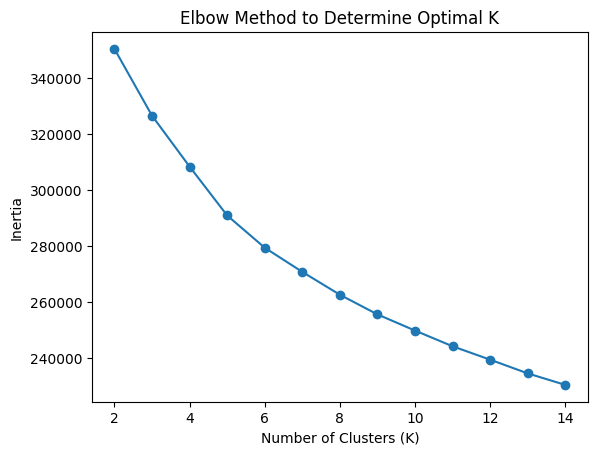

Inertia (Total within-cluster sum of squares): 249740.888970724
Unique cluster labels: [0 1 2 3 4 5 6 7 8 9]
Silhouette Score: 0.10338161744583478


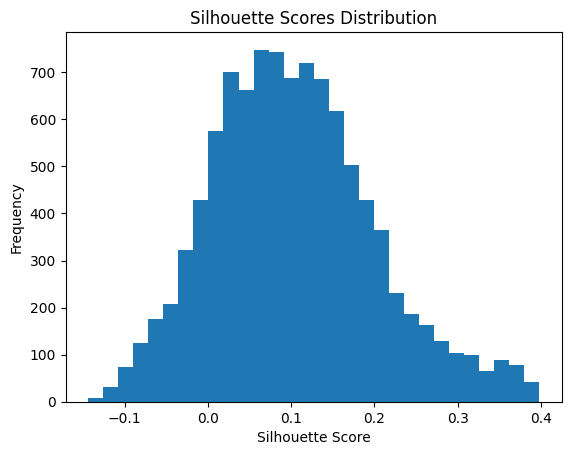

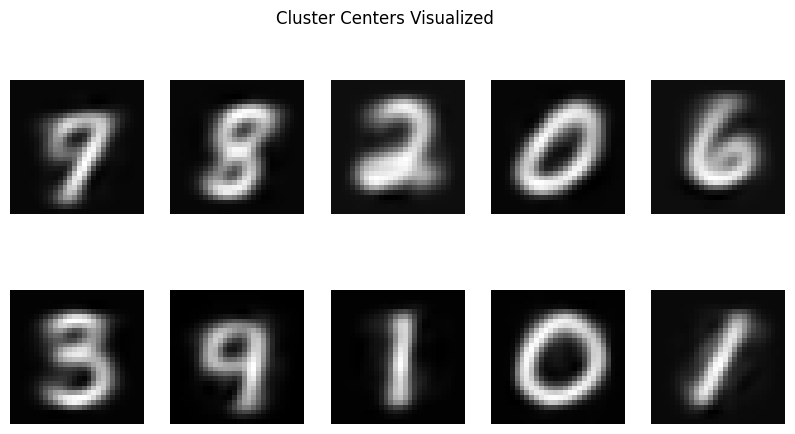

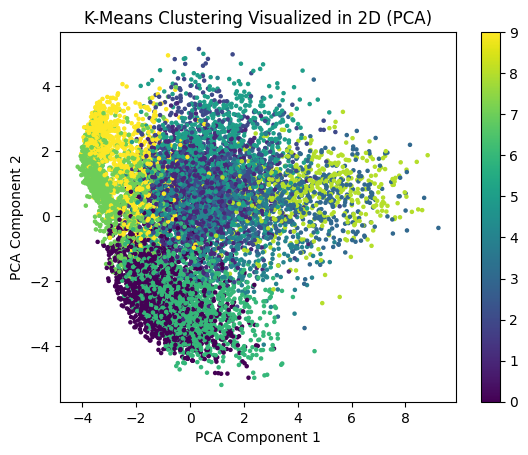

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

# Loading the MNIST dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Normalizing features for both train and test datasets (Scale to [0, 1])
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Downsample for efficiency
subset_indices = np.random.choice(X_train.shape[0], 10000, replace=False)
X_train_sampled = X_train[subset_indices]
y_train_sampled = y_train[subset_indices]

# PCA for dimensionality reduction (reducing to 30 components)
pca = PCA(n_components=30, random_state=42)
X_train_pca = pca.fit_transform(X_train_sampled)

# Finding the optimal number of clusters using the Elbow Method
inertias = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, init='k-means++')
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 15), inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# Choosing the optimal K from the elbow plot
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50, init='k-means++').fit(X_train_pca)

# Evaluating the results
print("Inertia (Total within-cluster sum of squares):", kmeans.inertia_)
print("Unique cluster labels:", np.unique(kmeans.labels_))

# Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(X_train_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualizing the silhouette scores distribution
silhouette_vals = silhouette_samples(X_train_pca, kmeans.labels_)
plt.hist(silhouette_vals, bins=30)
plt.title("Silhouette Scores Distribution")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()

# Visualizing the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_original = pca.inverse_transform(cluster_centers)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster_centers_original[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Cluster Centers Visualized")
plt.show()

# PCA for 2D visualization
pca_2d = PCA(n_components=2, random_state=42)
X_train_2d = pca_2d.fit_transform(X_train_sampled)

# Visualizing K-Means clustering
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=5)
plt.colorbar()
plt.title("K-Means Clustering Visualized")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Elbow shows 10 clusters, but silhouette (~0.10) shows limited separation.
# K-Means struggles with complex datasets; clusters overlap.
# Centers resemble digits but not perfectly distinct.


